In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf 

import sklearn
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


Input dimensions: 784


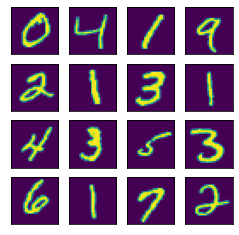

In [36]:
(x_train, _), (x_test, _) = mnist.load_data()
n = 4

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Input dimensions:", x_train[0].size)

plt.figure(figsize=(4, 4))

# Plot 4x4 grid of training samples
for i in range(1, n*n+1):
    ax = plt.subplot(n, n, i)
    plt.imshow(x_train[i])
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)


In [43]:
# Define autoencoder

latent_dim = 32

class Autoencoder(Model):
    # Constructor
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            # Converts tensor input to vector? (28, 28) -> (784)
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            # Output 784 pixel values between [0, 1]
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28)),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def sample(self, latent_x):
        # Sample from the latent space
        decoded = self.decoder(latent_x)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [44]:
# "Configures the model for training", we specify loss, metrics, etc.
autoencoder.compile(optimizer='adam', loss = losses.MeanSquaredError())


In [45]:
# Training
# epochs: nr passes over the dataset
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0325 - val_loss: 0.0164
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0137 - val_loss: 0.0114
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 4/10
1875/1875 [==============================] - 2s 1000us/step - loss: 0.0107 - val_loss: 0.0102
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 7/10
1875/1875 [==============================] - 2s 996us/step - loss: 0.0103 - val_loss: 0.0099
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 

In [69]:
# Evaluate of test set
encoded_imgs = autoencoder.encoder(x_test).numpy()
print(encoded_imgs.shape)
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

(10000, 32)


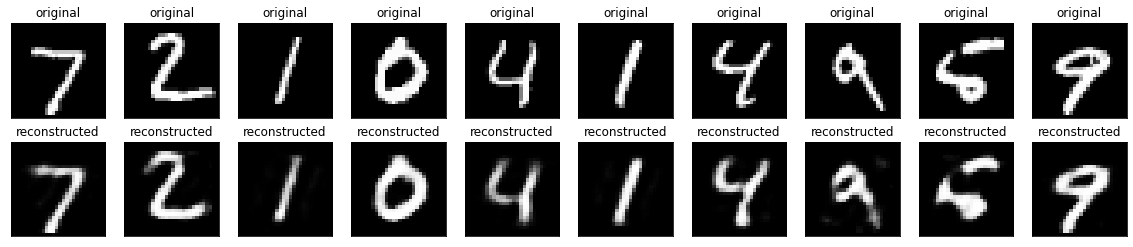

In [51]:
n = 10
plt.figure(figsize=(20, 4)) # Specifies window width / height
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [97]:
# linear interpolation test
img_1 = x_test[2].reshape(1, x_test[0].size) # resize to single element tensor
img_2 = x_test[3].reshape(1, x_test[1].size)

# image encodings
encoded_img_1 = autoencoder.encoder(img_1).numpy() 
encoded_img_2 = autoencoder.encoder(img_2).numpy()
nbr_points = 12

t = np.linspace(1, 0, num=nbr_points)

encoded_interpols = np.zeros([nbr_points, encoded_img_1.size])

for i in range(nbr_points):
    encoded_interpols[i] = t[i] * encoded_img_1 + (1-t[i]) * encoded_img_2

print(encoded_interpols.shape)

decoded_interpols = autoencoder.decoder(encoded_interpols).numpy()

(12, 32)


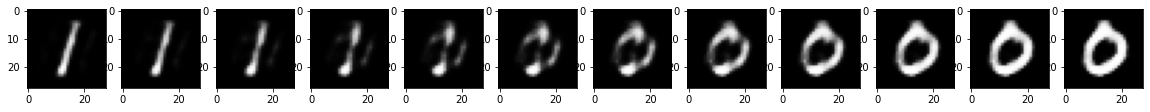

In [98]:
# Plot interpolations

plt.figure(figsize=(20, 4))
for i in range(nbr_points):
    ax = plt.subplot(1, nbr_points, i+1)
    plt.imshow(decoded_interpols[i])

In [93]:
decoded_interpols.shape

(12, 28, 28)